In [1]:
!kaggle datasets download -d bryanb/abstract-art-gallery

Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 5, in <module>
    from kaggle.cli import main
  File "/usr/local/lib/python2.7/dist-packages/kaggle/__init__.py", line 23, in <module>
    api.authenticate()
  File "/usr/local/lib/python2.7/dist-packages/kaggle/api/kaggle_api_extended.py", line 146, in authenticate
    self.config_file, self.config_dir))
IOError: Could not find kaggle.json. Make sure it's located in /root/.kaggle. Or use the environment method.


In [2]:
! pip install -q kaggle

In [3]:
from google.colab import files

In [4]:
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"aviralpamecha","key":"f95221c0024d4c4912607856d828a1b4"}'}

In [5]:
! mkdir ~/.kaggle

mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [6]:
! cp kaggle.json ~/.kaggle/

In [7]:
 !chmod 600 ~/.kaggle/kaggle.json

In [8]:
!kaggle datasets download -d bryanb/abstract-art-gallery

 99% 409M/415M [00:06<00:00, 59.9MB/s]
100% 415M/415M [00:06<00:00, 64.1MB/s]


In [9]:
! mkdir abstract_art

In [10]:
cd abstract_art/

/content/abstract_art


In [11]:
! unzip ../abstract-art-gallery.zip -d abstract_art

Archive:  ../abstract-art-gallery.zip
  inflating: abstract_art/Abstract_gallery/Abstract_image_0.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_10.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_100.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1000.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1001.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1002.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1003.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1004.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1005.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1006.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1007.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1008.jpg  
  inflating: abstract_art/Abstract_gallery/Abstract_image_1009.jpg  
  inf

In [87]:
import numpy as np
import pandas as pd
import array
from tensorflow import concat
import tensorflow as tf
    

In [88]:
import matplotlib.pyplot as plt

In [89]:
import os
from matplotlib.image import imread


In [90]:
data_dir = '/content/abstract_art/abstract_art/Abstract_gallery'

In [91]:
os.listdir(data_dir)

['Abstract_image_2120.jpg',
 'Abstract_image_1684.jpg',
 'Abstract_image_2037.jpg',
 'Abstract_image_1490.jpg',
 'Abstract_image_2380.jpg',
 'Abstract_image_80.jpg',
 'Abstract_image_500.jpg',
 'Abstract_image_2032.jpg',
 'Abstract_image_197.jpg',
 'Abstract_image_2356.jpg',
 'Abstract_image_114.jpg',
 'Abstract_image_2060.jpg',
 'Abstract_image_832.jpg',
 'Abstract_image_838.jpg',
 'Abstract_image_1801.jpg',
 'Abstract_image_86.jpg',
 'Abstract_image_1561.jpg',
 'Abstract_image_447.jpg',
 'Abstract_image_833.jpg',
 'Abstract_image_1830.jpg',
 'Abstract_image_2454.jpg',
 'Abstract_image_1983.jpg',
 'Abstract_image_72.jpg',
 'Abstract_image_2686.jpg',
 'Abstract_image_2718.jpg',
 'Abstract_image_1628.jpg',
 'Abstract_image_867.jpg',
 'Abstract_image_472.jpg',
 'Abstract_image_2566.jpg',
 'Abstract_image_534.jpg',
 'Abstract_image_2031.jpg',
 'Abstract_image_2329.jpg',
 'Abstract_image_1893.jpg',
 'Abstract_image_1870.jpg',
 'Abstract_image_1029.jpg',
 'Abstract_image_368.jpg',
 'Abstrac

In [92]:
j = 0

In [106]:
b = []
c=0

for j in range(j,len(os.listdir(data_dir))):
    if(c==50):
        break
    b.append(os.listdir(data_dir)[j])
    c+=1
    

In [97]:
j

100

In [107]:

a=[]
for i in b :
    sam_img = data_dir + '/' + i
    sam_img_ten =  imread(sam_img)
    sam_img_ten = tf.image.resize(sam_img_ten, [500,500], method='nearest')
    sam_img_ten = tf.dtypes.cast(sam_img_ten, tf.int32)
    if(c==0):
        train = tf.stack([sam_img_ten])
        c+=1
    else:
        
        train = tf.concat((train, tf.stack([sam_img_ten], axis = 0)), axis=0)
        
    
    
    

    


    
    

    
    

In [109]:
train = train/255

In [108]:
train.shape

TensorShape([300, 500, 500, 3])

In [64]:
import tensorflow as tf
from tensorflow.keras.layers import Dense,Reshape,Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout,LeakyReLU,BatchNormalization,Conv2D,Conv2DTranspose
from tensorflow.keras.models import Sequential

In [65]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 100


In [193]:
generator = Sequential()
generator.add(Dense(125 * 125 * 2, input_shape=[codings_size]))
generator.add(Reshape([125, 125, 2]))
generator.add(BatchNormalization()) 
generator.add(Conv2DTranspose(64, kernel_size=5, strides=2, padding="same",
                                 activation="relu"))
generator.add(BatchNormalization())
generator.add(Conv2DTranspose(3, kernel_size=5, strides=2, padding="same",
                                 activation="tanh"))

In [194]:
discriminator = Sequential()
discriminator.add(Conv2D(64, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3),
                        input_shape=(500, 500,3)))

discriminator.add(Dropout(0.5))
discriminator.add(Conv2D(128, kernel_size=5, strides=2, padding="same",
                        activation=LeakyReLU(0.3)))
discriminator.add(Dropout(0.5))
discriminator.add(Flatten())
discriminator.add(Dense(1, activation="sigmoid"))

In [195]:
GAN = Sequential([generator, discriminator])

In [196]:
discriminator.compile(loss="binary_crossentropy", optimizer="adam")
discriminator.trainable = False

In [197]:
GAN.compile(loss="binary_crossentropy", optimizer="adam")

In [198]:
GAN.layers

In [199]:
GAN.summary()

Model: "sequential_46"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential_44 (Sequential)   (None, 500, 500, 3)       3164581   
_________________________________________________________________
sequential_45 (Sequential)   (None, 1)                 2209793   
Total params: 5,374,374
Trainable params: 3,164,449
Non-trainable params: 2,209,925
_________________________________________________________________


In [200]:
GAN.layers[0].summary()

Model: "sequential_44"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_30 (Dense)             (None, 31250)             3156250   
_________________________________________________________________
reshape_13 (Reshape)         (None, 125, 125, 2)       0         
_________________________________________________________________
batch_normalization_28 (Batc (None, 125, 125, 2)       8         
_________________________________________________________________
conv2d_transpose_27 (Conv2DT (None, 250, 250, 64)      3264      
_________________________________________________________________
batch_normalization_29 (Batc (None, 250, 250, 64)      256       
_________________________________________________________________
conv2d_transpose_28 (Conv2DT (None, 500, 500, 3)       4803      
Total params: 3,164,581
Trainable params: 3,164,449
Non-trainable params: 132
_________________________________________

In [201]:
GAN.layers[1].summary()

Model: "sequential_45"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_32 (Conv2D)           (None, 250, 250, 64)      4864      
_________________________________________________________________
dropout_32 (Dropout)         (None, 250, 250, 64)      0         
_________________________________________________________________
conv2d_33 (Conv2D)           (None, 125, 125, 128)     204928    
_________________________________________________________________
dropout_33 (Dropout)         (None, 125, 125, 128)     0         
_________________________________________________________________
flatten_16 (Flatten)         (None, 2000000)           0         
_________________________________________________________________
dense_31 (Dense)             (None, 1)                 2000001   
Total params: 2,209,793
Trainable params: 0
Non-trainable params: 2,209,793
___________________________________________

In [202]:
batch_size = 8

In [203]:
# my_data = X_train
my_data = train

In [204]:
dataset = tf.data.Dataset.from_tensor_slices(my_data).shuffle(buffer_size=100)

In [205]:
type(dataset)

tensorflow.python.data.ops.dataset_ops.ShuffleDataset

In [206]:
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [207]:
epochs = 50

In [208]:
# Grab the seprate components
generator, discriminator = GAN.layers

# For every epcoh
for epoch in range(epochs):
    print(f"Currently on Epoch {epoch+1}")
    i = 0
    # For every batch in the dataset
    for X_batch in dataset:
        i=i+1
        if i%100 == 0:
            print(f"\tCurrently on batch number {i} of {len(my_data)//batch_size}")
        #####################################
        ## TRAINING THE DISCRIMINATOR ######
        ###################################
        
        # Create Noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # Generate numbers based just on noise input
        gen_images = generator(noise)
        
        # Concatenate Generated Images against the Real Ones
        # TO use tf.concat, the data types must match!
        X_fake_vs_real = tf.concat([gen_images, tf.dtypes.cast(X_batch,tf.float32)], axis=0)
        
        # Targets set to zero for fake images and 1 for real images
        y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
        
        # This gets rid of a Keras warning
        discriminator.trainable = True
        
        # Train the discriminator on this batch
        discriminator.train_on_batch(X_fake_vs_real, y1)
        
        
        #####################################
        ## TRAINING THE GENERATOR     ######
        ###################################
        
        # Create some noise
        noise = tf.random.normal(shape=[batch_size, codings_size])
        
        # We want discriminator to belive that fake images are real
        y2 = tf.constant([[1.]] * batch_size)
        
        # Avois a warning
        discriminator.trainable = False
        
        GAN.train_on_batch(noise, y2)
        
print("TRAINING COMPLETE")            

Currently on Epoch 1
Currently on Epoch 2
Currently on Epoch 3
Currently on Epoch 4
Currently on Epoch 5
Currently on Epoch 6
Currently on Epoch 7
Currently on Epoch 8
Currently on Epoch 9
Currently on Epoch 10
Currently on Epoch 11
Currently on Epoch 12
Currently on Epoch 13
Currently on Epoch 14
Currently on Epoch 15
Currently on Epoch 16
Currently on Epoch 17
Currently on Epoch 18
Currently on Epoch 19
Currently on Epoch 20
Currently on Epoch 21
Currently on Epoch 22
Currently on Epoch 23
Currently on Epoch 24
Currently on Epoch 25
Currently on Epoch 26
Currently on Epoch 27
Currently on Epoch 28
Currently on Epoch 29
Currently on Epoch 30
Currently on Epoch 31
Currently on Epoch 32
Currently on Epoch 33
Currently on Epoch 34
Currently on Epoch 35
Currently on Epoch 36
Currently on Epoch 37
Currently on Epoch 38
Currently on Epoch 39
Currently on Epoch 40
Currently on Epoch 41
Currently on Epoch 42
Currently on Epoch 43
Currently on Epoch 44
Currently on Epoch 45
Currently on Epoch 

In [209]:
noise = tf.random.normal(shape=[10, codings_size])

In [210]:
noise.shape

TensorShape([10, 100])

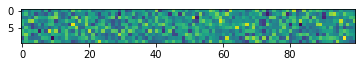

In [211]:
plt.imshow(noise)

In [212]:
images = generator(noise)

In [213]:
single_image = images[0]

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


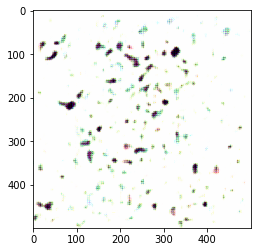

In [214]:
plt.imshow(single_image)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


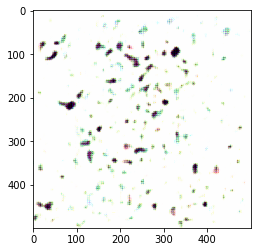

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


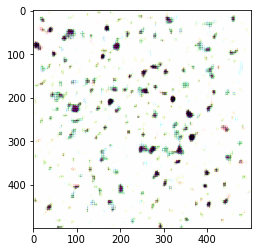

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


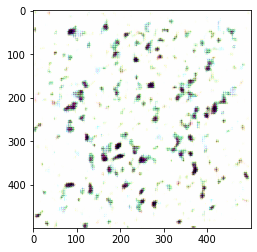

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


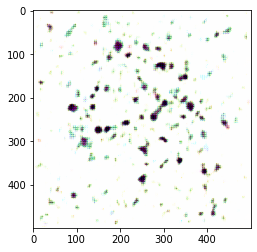

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


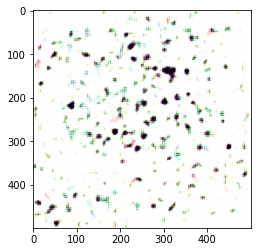

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


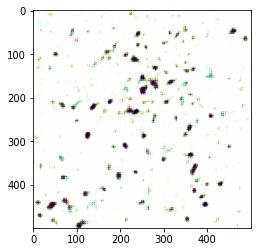

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


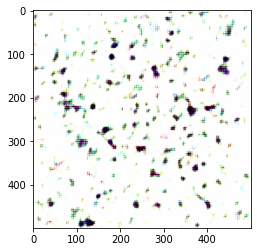

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


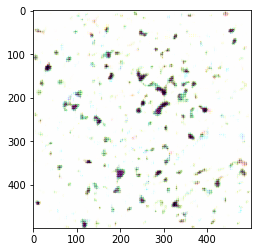

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


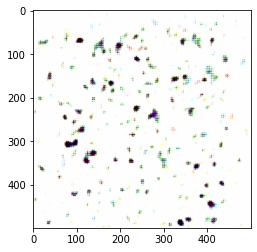

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


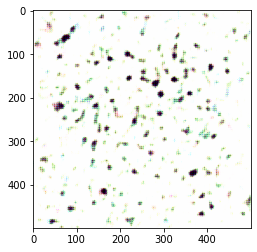

In [215]:
for image in images:
    plt.imshow(image.numpy().reshape(500,500,3))
    plt.show()